In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv
/kaggle/input/cardio-data/Cardio_Data.csv


**Logistic Regression**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8098739495798319
Testing Accuracy: 0.8319327731092437


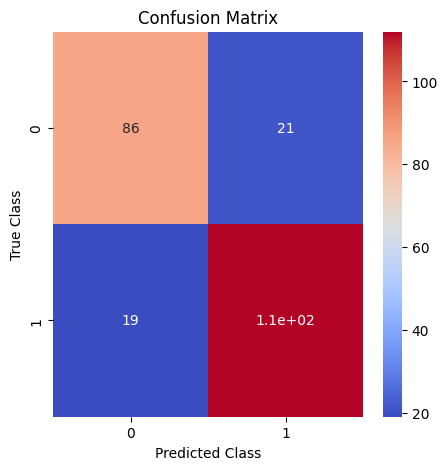

Precision: 0.8421052631578947
Sensitivity: 0.8549618320610687
Specificity: 0.8037383177570093
F1-score: 0.8484848484848484


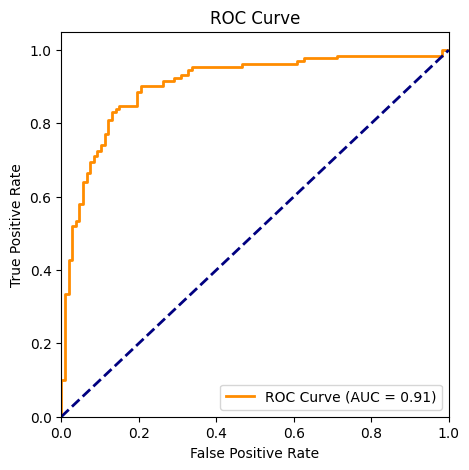

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Sex, Chest Pain Type, Fasting Blood Sugar, Exercise-Induced Angina, Oldpeak, and ST Slope

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Multiple Regression**

Accuracy: 0.7058823529411765


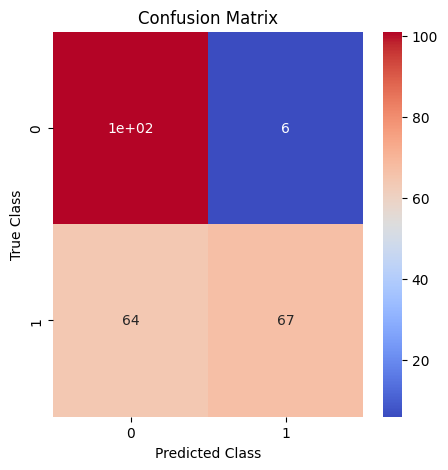

Precision: 0.9178082191780822
Sensitivity: 0.5114503816793893
Specificity: 0.9439252336448598
F1-score: 0.6568627450980392


In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# predictions on the test set
y_pred = regr.predict(X_test)

# applying a threshold of 0.8 to obtain binary predictions
y_pred_binary = np.where(y_pred >= 0.8, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

**Decision Tree**

Training Accuracy: 0.8813025210084033
Testing Accuracy: 0.8487394957983193


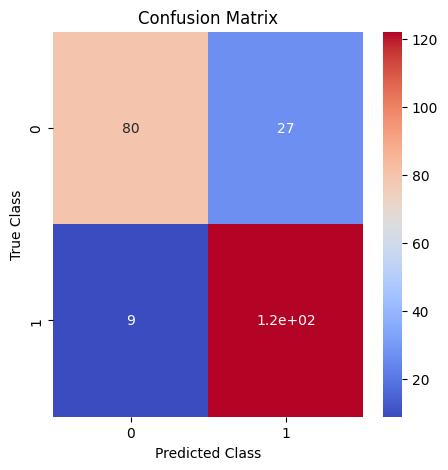

Precision: 0.8187919463087249
Sensitivity: 0.9312977099236641
Specificity: 0.7476635514018691
F1-score: 0.8714285714285714


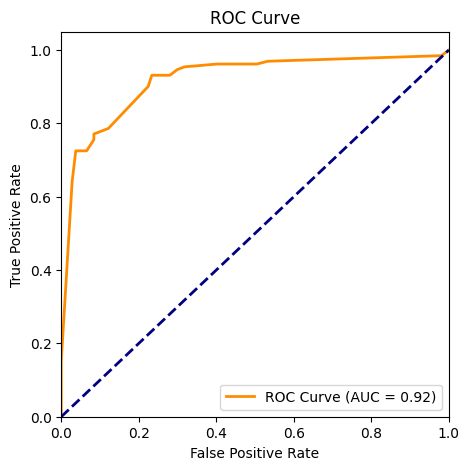

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth = 5, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest**

Training Accuracy: 0.9002100840336135
Testing Accuracy: 0.9159663865546218


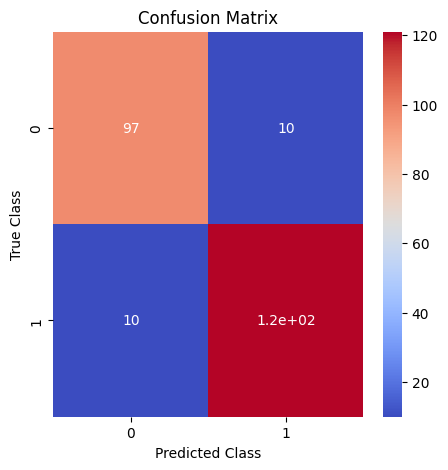

Precision: 0.9236641221374046
Sensitivity: 0.9236641221374046
Specificity: 0.9065420560747663
F1-score: 0.9236641221374046


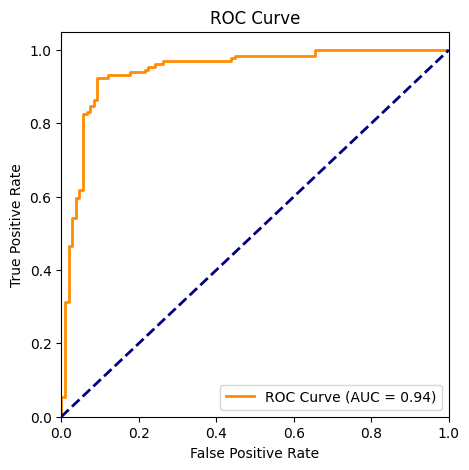

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(max_depth = 5, n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**KNN**

Training Accuracy: 0.7878151260504201
Testing Accuracy: 0.7184873949579832


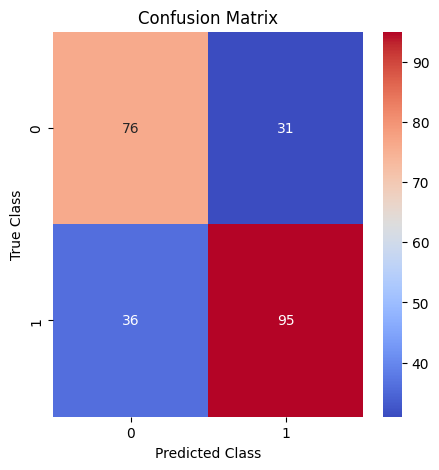

Precision: 0.753968253968254
Sensitivity: 0.7251908396946565
Specificity: 0.7102803738317757
F1-score: 0.7392996108949417


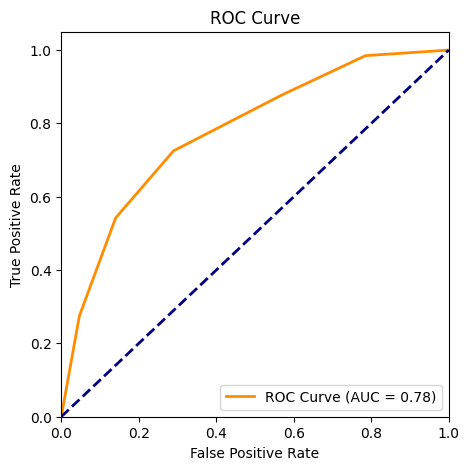

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**SVM**

Training Accuracy: 0.8277310924369747
Testing Accuracy: 0.8487394957983193


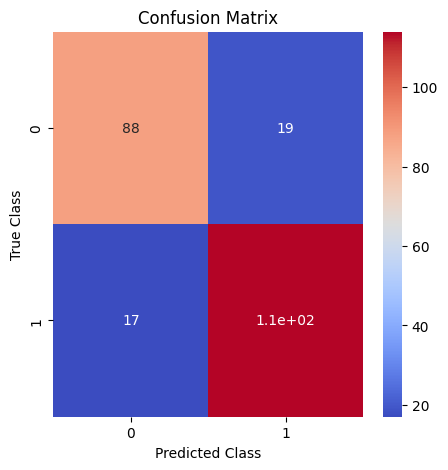

Precision: 0.8571428571428571
Sensitivity: 0.8702290076335878
Specificity: 0.822429906542056
F1-score: 0.8636363636363635


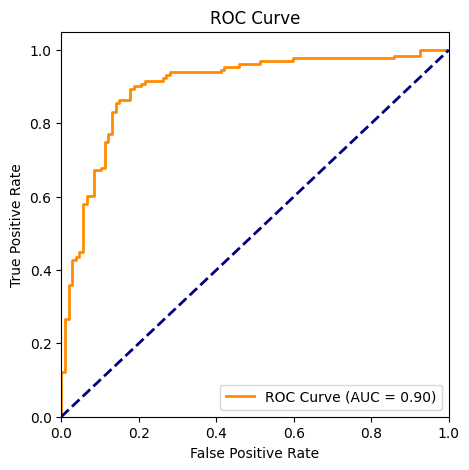

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Naive Bayes**

Training Accuracy: 0.832983193277311
Testing Accuracy: 0.8571428571428571


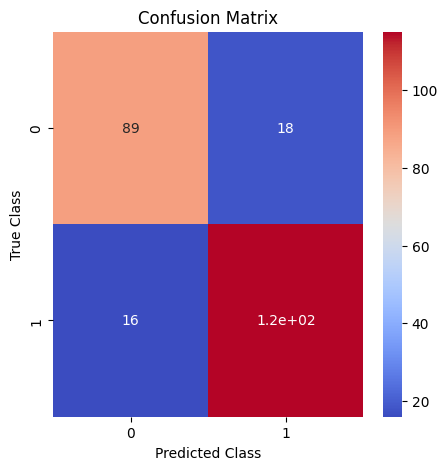

Precision: 0.8646616541353384
Sensitivity: 0.8778625954198473
Specificity: 0.8317757009345794
F1-score: 0.8712121212121212


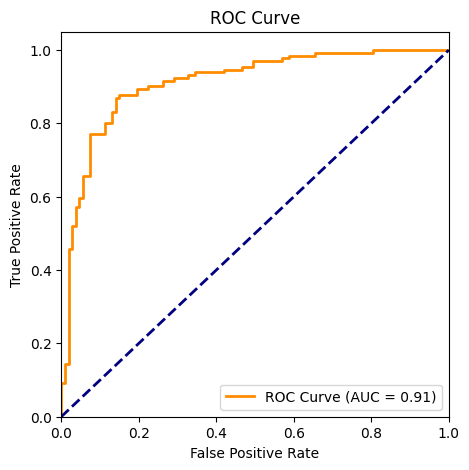

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gaussian Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**MLP**

Training Accuracy: 0.8466386554621849
Testing Accuracy: 0.8529411764705882


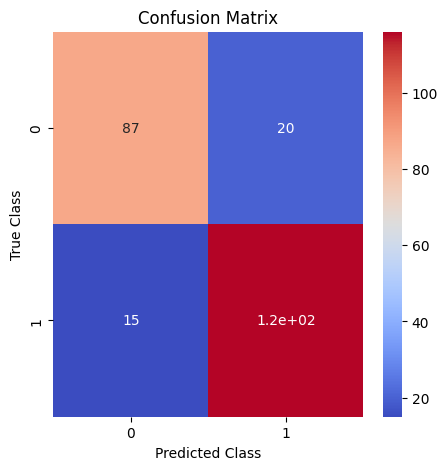

Precision: 0.8529411764705882
Sensitivity: 0.8854961832061069
Specificity: 0.8130841121495327
F1-score: 0.8689138576779026


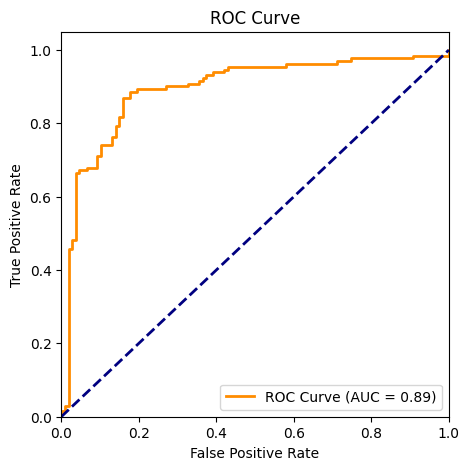

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an Artificial Neural Network (ANN) classifier
ann_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = ann_model.predict(X_train)
y_test_pred = ann_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, ann_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**XGBoost**

Training Accuracy: 1.0
Testing Accuracy: 0.9453781512605042


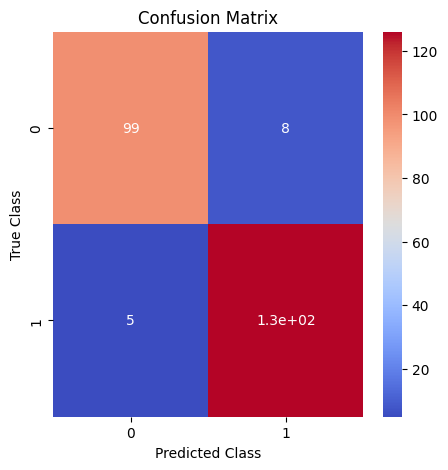

Precision: 0.9402985074626866
Sensitivity (Recall): 0.9618320610687023
Specificity: 0.9252336448598131
F1-score: 0.9509433962264152


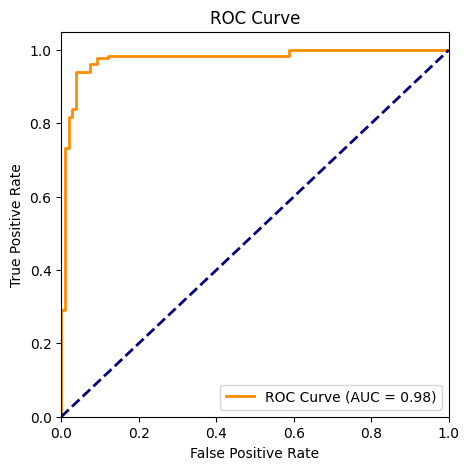

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Training Accuracy: 1.0
Testing Accuracy: 0.957983193277311


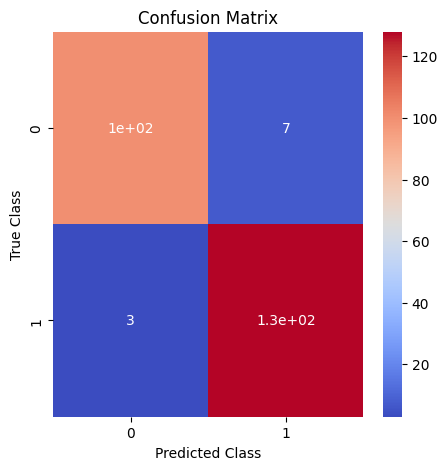

Precision: 0.9481481481481482
Sensitivity (Recall): 0.9770992366412213
Specificity: 0.9345794392523364
F1-score: 0.962406015037594


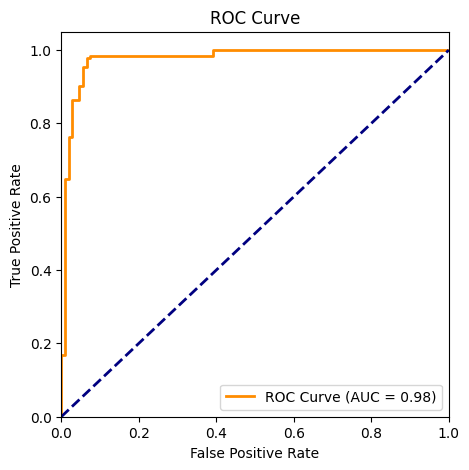

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier with overfitting mitigation techniques
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=21,
    max_depth=7,  # Limit tree depth
    min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,  # Fraction of samples used for training
    colsample_bytree=0.8,  # Fraction of features used for training
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=1.0  # L2 regularization term on weights
)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**AdaBoost**

Training Accuracy: 0.8781512605042017
Testing Accuracy: 0.8697478991596639


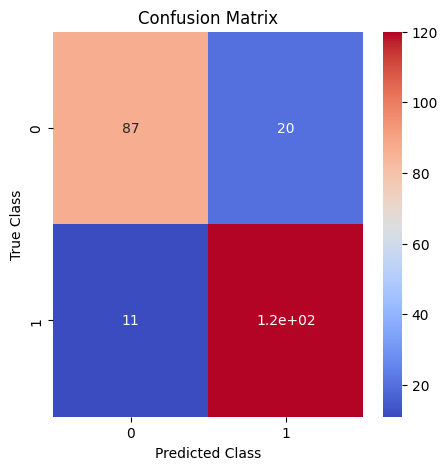

Precision: 0.8571428571428571
Sensitivity (Recall): 0.916030534351145
Specificity: 0.8130841121495327
F1-score: 0.8856088560885609


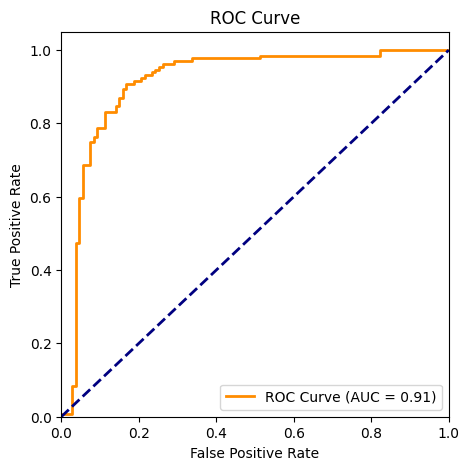

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Stochastic Gradient Classifier**

Training Accuracy: 0.7184873949579832
Testing Accuracy: 0.7521008403361344


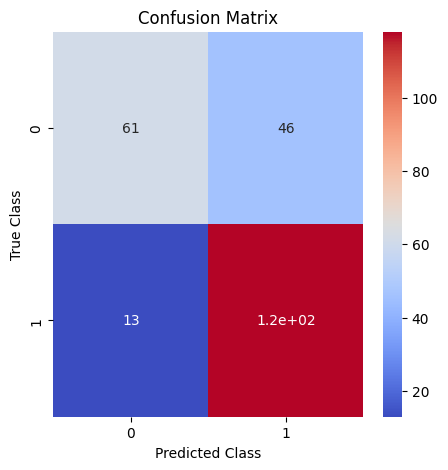

Precision: 0.7195121951219512
Sensitivity (Recall): 0.9007633587786259
Specificity: 0.5700934579439252
F1-score: 0.7999999999999999


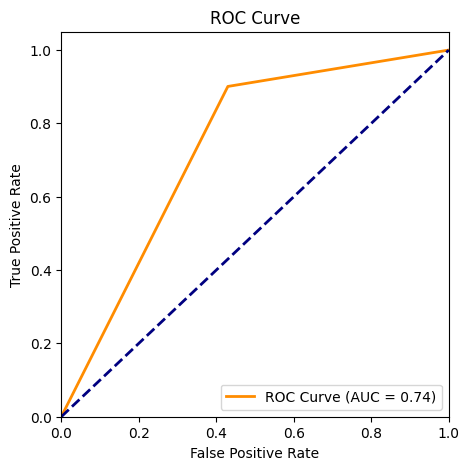

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SGD Classifier
sgd_model = SGDClassifier(loss = "modified_huber", random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Training Accuracy: 0.75
Testing Accuracy: 0.7647058823529411


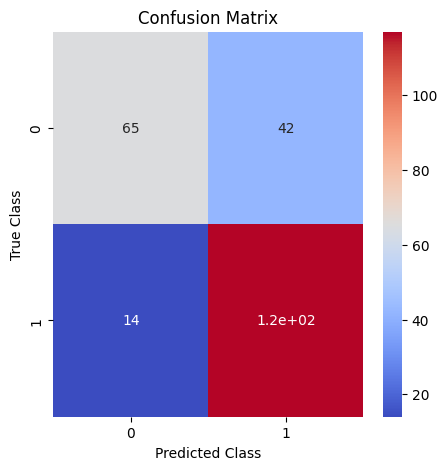

Precision: 0.7358490566037735
Sensitivity (Recall): 0.8931297709923665
Specificity: 0.6074766355140186
F1-score: 0.8068965517241379


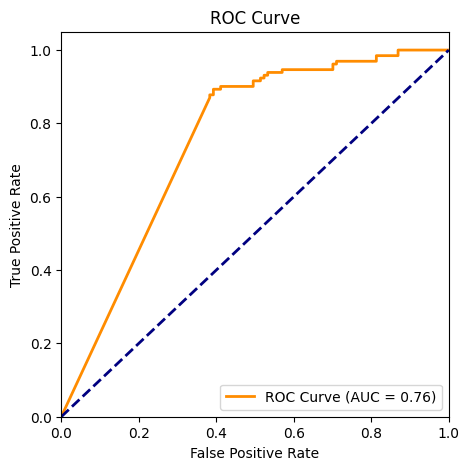

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an SGD Classifier
sgd_model = SGDClassifier(
    loss="log",  # The loss function (hinge for linear SVM)
    penalty="l2",  # Regularization term (l2 for Ridge regularization)
    alpha=0.001,  # Regularization strength
    max_iter=1000,  # Maximum number of iterations
    random_state=42
)

sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Gradient Boosting Classifier**

Training Accuracy: 0.9989495798319328
Testing Accuracy: 0.9537815126050421


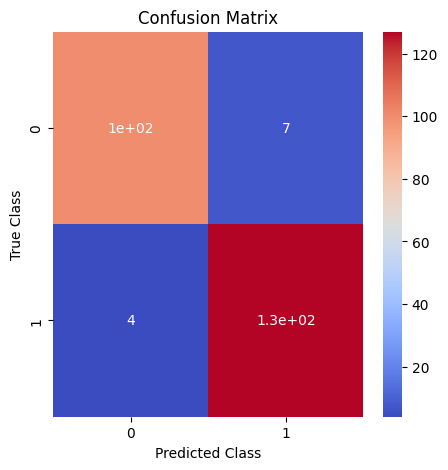

Precision: 0.9477611940298507
Sensitivity (Recall): 0.9694656488549618
Specificity: 0.9345794392523364
F1-score: 0.9584905660377357


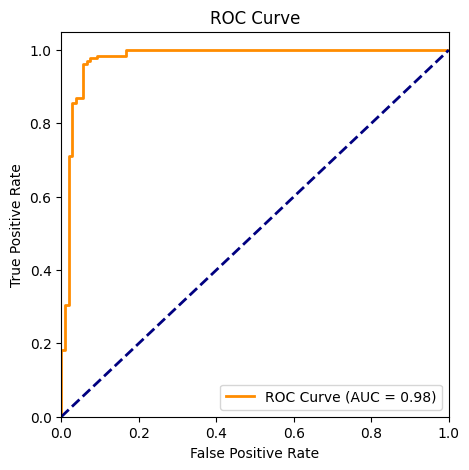

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages to be used
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

gb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Extra Tree Classifier**

Training Accuracy: 0.8739495798319328
Testing Accuracy: 0.8781512605042017


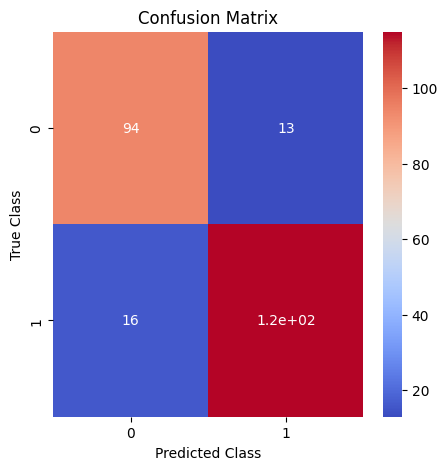

Precision: 0.8984375
Sensitivity (Recall): 0.8778625954198473
Specificity: 0.8785046728971962
F1-score: 0.888030888030888


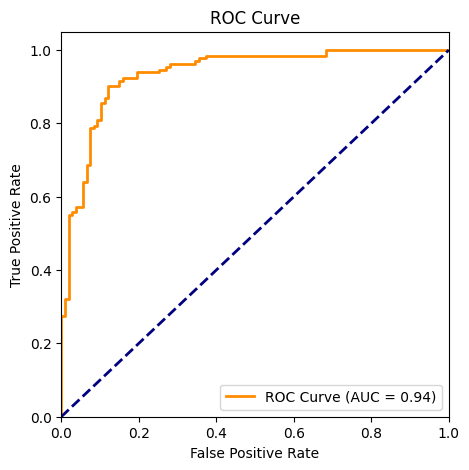

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

extra_trees_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = extra_trees_model.predict(X_train)
y_test_pred = extra_trees_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, extra_trees_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, extra_trees_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**RNN**

Epoch 1/100
12/12 - 4s - loss: 0.4844 - accuracy: 0.7963 - val_loss: 0.4664 - val_accuracy: 0.7696 - 4s/epoch - 309ms/step
Epoch 2/100
12/12 - 0s - loss: 0.3828 - accuracy: 0.8305 - val_loss: 0.4759 - val_accuracy: 0.7906 - 69ms/epoch - 6ms/step
Epoch 3/100
12/12 - 0s - loss: 0.3682 - accuracy: 0.8423 - val_loss: 0.4664 - val_accuracy: 0.7696 - 71ms/epoch - 6ms/step
Epoch 4/100
12/12 - 0s - loss: 0.3546 - accuracy: 0.8476 - val_loss: 0.4575 - val_accuracy: 0.7906 - 71ms/epoch - 6ms/step
Epoch 5/100
12/12 - 0s - loss: 0.3420 - accuracy: 0.8515 - val_loss: 0.4530 - val_accuracy: 0.7801 - 73ms/epoch - 6ms/step
Epoch 6/100
12/12 - 0s - loss: 0.3313 - accuracy: 0.8541 - val_loss: 0.4431 - val_accuracy: 0.8010 - 68ms/epoch - 6ms/step
Epoch 7/100
12/12 - 0s - loss: 0.3246 - accuracy: 0.8594 - val_loss: 0.4437 - val_accuracy: 0.8010 - 71ms/epoch - 6ms/step
Epoch 8/100
12/12 - 0s - loss: 0.3152 - accuracy: 0.8673 - val_loss: 0.4450 - val_accuracy: 0.8010 - 83ms/epoch - 7ms/step
Epoch 9/100
12/1

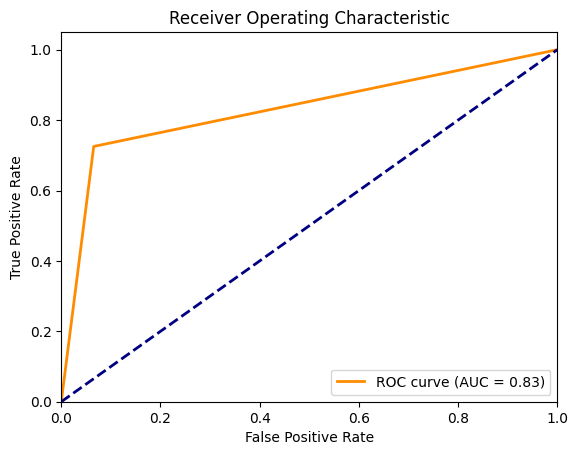

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for SimpleRNN input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the RNN model using SimpleRNN
model = keras.Sequential([
    layers.SimpleRNN(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**LSTM**

Epoch 1/100
24/24 - 7s - loss: 0.6868 - accuracy: 0.6991 - val_loss: 0.6748 - val_accuracy: 0.7225 - 7s/epoch - 297ms/step
Epoch 2/100
24/24 - 0s - loss: 0.6010 - accuracy: 0.8173 - val_loss: 0.5199 - val_accuracy: 0.7853 - 183ms/epoch - 8ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4234 - accuracy: 0.8318 - val_loss: 0.4514 - val_accuracy: 0.7906 - 187ms/epoch - 8ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3778 - accuracy: 0.8318 - val_loss: 0.4602 - val_accuracy: 0.8010 - 184ms/epoch - 8ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3604 - accuracy: 0.8476 - val_loss: 0.4605 - val_accuracy: 0.7749 - 175ms/epoch - 7ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3510 - accuracy: 0.8476 - val_loss: 0.4621 - val_accuracy: 0.7853 - 182ms/epoch - 8ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3447 - accuracy: 0.8528 - val_loss: 0.4607 - val_accuracy: 0.7801 - 189ms/epoch - 8ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3378 - accuracy: 0.8528 - val_loss: 0.4658 - val_accuracy: 0.7906 - 194ms/epoch - 8ms/step
Epoch 9/1

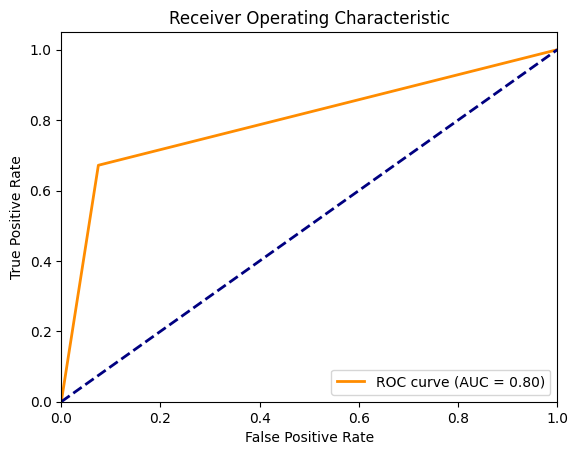

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for LSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the LSTM model
model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**GRU**

Epoch 1/100
24/24 - 7s - loss: 0.6344 - accuracy: 0.7884 - val_loss: 0.5566 - val_accuracy: 0.7592 - 7s/epoch - 292ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4265 - accuracy: 0.8292 - val_loss: 0.4525 - val_accuracy: 0.7853 - 176ms/epoch - 7ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3718 - accuracy: 0.8384 - val_loss: 0.4469 - val_accuracy: 0.8010 - 189ms/epoch - 8ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3559 - accuracy: 0.8489 - val_loss: 0.4481 - val_accuracy: 0.7958 - 178ms/epoch - 7ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3431 - accuracy: 0.8581 - val_loss: 0.4452 - val_accuracy: 0.7906 - 183ms/epoch - 8ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3343 - accuracy: 0.8502 - val_loss: 0.4446 - val_accuracy: 0.7958 - 191ms/epoch - 8ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3266 - accuracy: 0.8633 - val_loss: 0.4392 - val_accuracy: 0.8010 - 180ms/epoch - 8ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3158 - accuracy: 0.8739 - val_loss: 0.4443 - val_accuracy: 0.8063 - 196ms/epoch - 8ms/step
Epoch 9/1

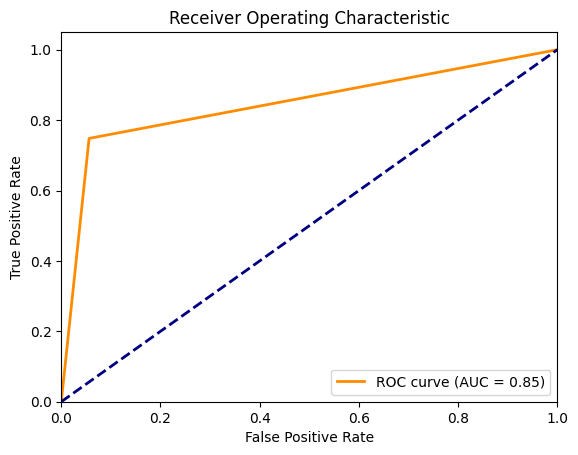

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for GRU input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the GRU model
model = keras.Sequential([
    layers.GRU(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.GRU(64, return_sequences=True),
    layers.GRU(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**CNN**

Epoch 1/100
24/24 - 1s - loss: 0.6094 - accuracy: 0.6951 - val_loss: 0.5573 - val_accuracy: 0.7592 - 1s/epoch - 61ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4682 - accuracy: 0.8055 - val_loss: 0.5248 - val_accuracy: 0.7539 - 115ms/epoch - 5ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4233 - accuracy: 0.8173 - val_loss: 0.4932 - val_accuracy: 0.7644 - 120ms/epoch - 5ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4046 - accuracy: 0.8331 - val_loss: 0.4817 - val_accuracy: 0.7801 - 117ms/epoch - 5ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3981 - accuracy: 0.8239 - val_loss: 0.4835 - val_accuracy: 0.7853 - 118ms/epoch - 5ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4033 - accuracy: 0.8344 - val_loss: 0.4732 - val_accuracy: 0.7906 - 118ms/epoch - 5ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3844 - accuracy: 0.8436 - val_loss: 0.4550 - val_accuracy: 0.7958 - 129ms/epoch - 5ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3681 - accuracy: 0.8357 - val_loss: 0.4540 - val_accuracy: 0.7958 - 119ms/epoch - 5ms/step
Epoch 9/10

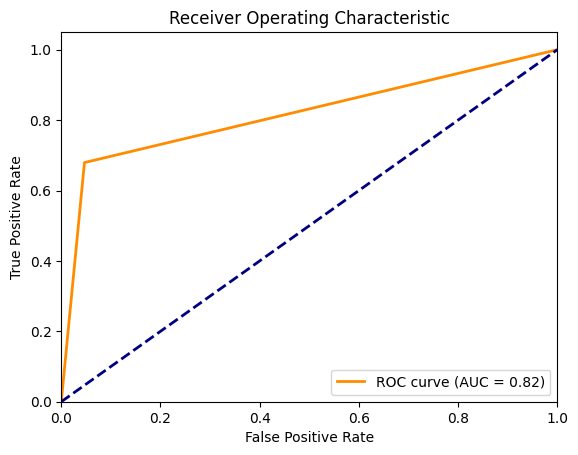

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for CNN input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Initialize and configure the CNN model
model = keras.Sequential([
    layers.Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**BiLSTM**

Epoch 1/100
24/24 - 10s - loss: 0.6835 - accuracy: 0.7385 - val_loss: 0.6650 - val_accuracy: 0.7592 - 10s/epoch - 423ms/step
Epoch 2/100
24/24 - 0s - loss: 0.5453 - accuracy: 0.8292 - val_loss: 0.4774 - val_accuracy: 0.7696 - 245ms/epoch - 10ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4065 - accuracy: 0.8292 - val_loss: 0.4532 - val_accuracy: 0.7906 - 242ms/epoch - 10ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3664 - accuracy: 0.8384 - val_loss: 0.4478 - val_accuracy: 0.7696 - 237ms/epoch - 10ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3525 - accuracy: 0.8476 - val_loss: 0.4501 - val_accuracy: 0.7853 - 285ms/epoch - 12ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3418 - accuracy: 0.8528 - val_loss: 0.4460 - val_accuracy: 0.7696 - 249ms/epoch - 10ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3314 - accuracy: 0.8515 - val_loss: 0.4512 - val_accuracy: 0.7801 - 244ms/epoch - 10ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3224 - accuracy: 0.8594 - val_loss: 0.4559 - val_accuracy: 0.7906 - 243ms/epoch - 10ms/step


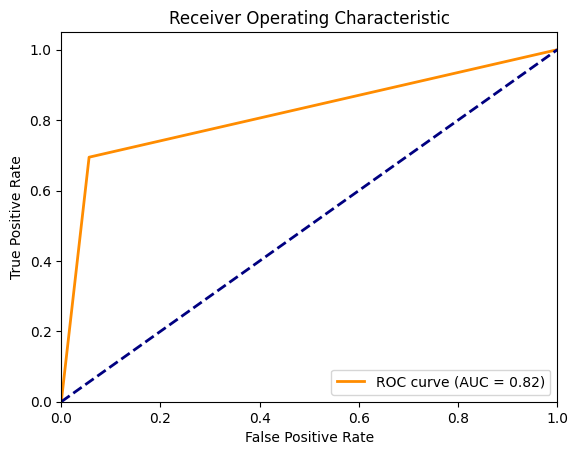

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.LSTM(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.LSTM(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**BiGRU**

Epoch 1/100
24/24 - 11s - loss: 0.6220 - accuracy: 0.8095 - val_loss: 0.5127 - val_accuracy: 0.7749 - 11s/epoch - 477ms/step
Epoch 2/100
24/24 - 0s - loss: 0.3932 - accuracy: 0.8344 - val_loss: 0.4841 - val_accuracy: 0.7696 - 224ms/epoch - 9ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3526 - accuracy: 0.8528 - val_loss: 0.4530 - val_accuracy: 0.8168 - 231ms/epoch - 10ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3411 - accuracy: 0.8502 - val_loss: 0.4598 - val_accuracy: 0.7592 - 258ms/epoch - 11ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3245 - accuracy: 0.8647 - val_loss: 0.4420 - val_accuracy: 0.8063 - 238ms/epoch - 10ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3163 - accuracy: 0.8594 - val_loss: 0.4411 - val_accuracy: 0.8063 - 225ms/epoch - 9ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3030 - accuracy: 0.8739 - val_loss: 0.4430 - val_accuracy: 0.7958 - 230ms/epoch - 10ms/step
Epoch 8/100
24/24 - 0s - loss: 0.2883 - accuracy: 0.8870 - val_loss: 0.4419 - val_accuracy: 0.8272 - 232ms/epoch - 10ms/step
Ep

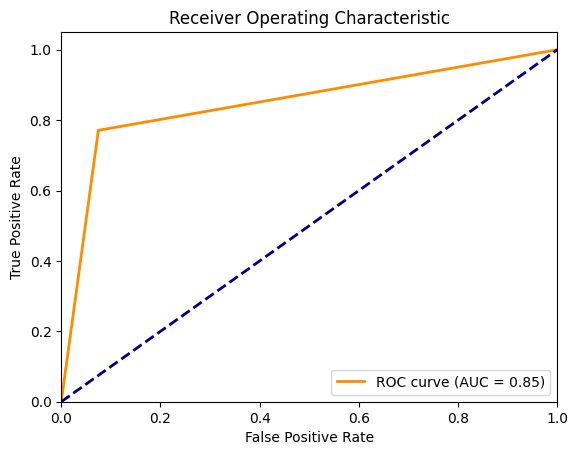

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.GRU(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.GRU(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.GRU(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [23]:
# @!BCE(&%&)